In [1]:
import pandas as pd
import xarray as xr
from erddapy import ERDDAP

In [2]:
server = 'http://erddap.dataexplorer.oceanobservatories.org/erddap'
protocol = 'tabledap'

e = ERDDAP(
    server=server,
    protocol=protocol
)

In [3]:
e.dataset_id = 'ooi-rs03ccal-mj03f-05-botpta301'

In [4]:
e.get_info_url()

'http://erddap.dataexplorer.oceanobservatories.org/erddap/info/ooi-rs03ccal-mj03f-05-botpta301/index.html'

In [5]:
info_df = pd.read_csv(e.get_info_url(response='csv'))

In [6]:
info_df.head()

,Row Type,Variable Name,Attribute Name,Data Type,Value
0,attribute,NC_GLOBAL,cdm_data_type,String,TimeSeries
1,attribute,NC_GLOBAL,cdm_timeseries_variables,String,"station,longitude,latitude"
2,attribute,NC_GLOBAL,contributor_email,String,feedback@axiomdatascience.com
3,attribute,NC_GLOBAL,contributor_name,String,Axiom Data Science
4,attribute,NC_GLOBAL,contributor_role,String,processor


In [7]:
info_df[info_df['Row Type']=='variable']

,Row Type,Variable Name,Attribute Name,Data Type,Value
52,variable,time,NaN,double,NaN
63,variable,latitude,NaN,double,NaN
72,variable,longitude,NaN,double,NaN
81,variable,z,NaN,double,NaN
93,variable,bottilt_scmp,NaN,double,NaN
106,variable,bottilt_xtlt,NaN,double,NaN
119,variable,bottilt_ytlt,NaN,double,NaN
132,variable,botpres,NaN,double,NaN
145,variable,bottilt_ccmp,NaN,double,NaN
158,variable,bottilt_tdir,NaN,double,NaN


In [8]:
e.variables = ['time', 'latitude', 'longitude', 'botpres', 'botsflu_meandepth', 'botsflu_meanpres']

In [9]:
e.constraints = {
    'time>=': '2014-01-01T00:00:00Z',
    'time<=': '2015-01-01T00:00:00Z',
}

In [10]:
e.get_download_url()

'http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-rs03ccal-mj03f-05-botpta301.html?time,latitude,longitude,botpres,botsflu_meandepth,botsflu_meanpres&time>=1388534400.0&time<=1420070400.0'

In [11]:
botpt_df = e.to_pandas()

In [12]:
botpt_df.head()

,time (UTC),latitude (degrees_north),longitude (degrees_east),botpres (psia),botsflu_meandepth (m),botsflu_meanpres (psi)
0,2014-08-29T20:59:00Z,45.95484,-130.00876,2255.105225,-1510.238009,2255.105387
1,2014-08-29T21:00:00Z,45.95484,-130.00876,2255.101685,-1510.232628,2255.102559
2,2014-08-29T21:01:00Z,45.95484,-130.00876,2255.102539,-1510.226831,2255.102181
3,2014-08-29T21:02:00Z,45.95484,-130.00876,2255.106018,-1510.224039,2255.106222
4,2014-08-29T21:03:00Z,45.95484,-130.00876,2255.116577,-1510.225469,2255.116496


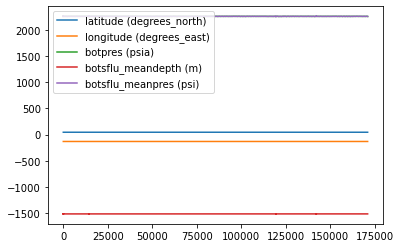

In [66]:
botpt_df.plot();

In [13]:
botpt_ds = e.to_xarray()
botpt_ds

<xarray.Dataset>
Dimensions:            (obs: 171137, timeseries: 1)
Coordinates:
    latitude           (timeseries) float64 ...
    longitude          (timeseries) float64 ...
    time               (obs) datetime64[ns] ...
Dimensions without coordinates: obs, timeseries
Data variables:
    station            (timeseries) object ...
    rowSize            (timeseries) int32 ...
    botpres            (obs) float64 ...
    botsflu_meandepth  (obs) float64 ...
    botsflu_meanpres   (obs) float64 ...
Attributes:
    cdm_data_type:                 TimeSeries
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             feedback@axiomdatascience.com
    contributor_name:              Axiom Data Science
    contributor_role:              processor
    contributor_role_vocabulary:   NERC
    contributor_url:               https://www.axiomdatascience.com
    Conventions:                   IOOS-1.2, CF-1.6, ACDD-1.3
    creator_institution:           Ocean Observatories Initiative (OOI)
    creator_name:                  Ocean Observatories Initiative (OOI)
    creator_sector:                gov_federal
    creator_type:                  institution
    creator_url:                   https://oceanobservatories.org/
    defaultDataQuery:              bottilt_tdir,bottilt_ytlt,bottilt_xtlt,bot...
    Easternmost_Easting:           -130.00876
    featureType:                   TimeSeries
    geospatial_lat_max:            45.95484
    geospatial_lat_min:            45.95484
    geospatial_lat_units:          degrees_north
    geospatial_lon_max:            -130.00876
    geospatial_lon_min:            -130.00876
    geospatial_lon_units:          degrees_east
    geospatial_vertical_positive:  up
    geospatial_vertical_units:     m
    history:                       Downloaded from Ocean Observatories Initia...
    id:                            104331
    infoUrl:                       https://sensors.ioos.us/#metadata/104331/s...
    institution:                   Ocean Observatories Initiative (OOI)
    license:                       The data may be used and redistributed for...
    naming_authority:              com.axiomdatascience
    Northernmost_Northing:         45.95484
    platform:                      buoy
    platform_name:                 Regional Cabled Array: Central Caldera: Me...
    platform_vocabulary:           http://mmisw.org/ont/ioos/platform
    processing_level:              Level 2
    publisher_institution:         Ocean Observatories Initiative (OOI)
    publisher_name:                Ocean Observatories Initiative (OOI)
    publisher_sector:              gov_federal
    publisher_type:                institution
    publisher_url:                 https://oceanobservatories.org/
    references:                    https://ooinet.oceanobservatories.org/data...
    sourceUrl:                     https://ooinet.oceanobservatories.org/data...
    Southernmost_Northing:         45.95484
    standard_name_vocabulary:      CF Standard Name Table v72
    station_id:                    104331
    summary:                       Timeseries data from 'Regional Cabled Arra...
    time_coverage_end:             2015-01-01T00:00:00Z
    time_coverage_start:           2014-08-29T20:59:00Z
    title:                         Regional Cabled Array: Central Caldera: Me...
    Westernmost_Easting:           -130.00876

In [14]:
botpt_ds = e.to_xarray(drop_variables=['station', 'rowSize'])
botpt_ds

<xarray.Dataset>
Dimensions:            (obs: 171137, timeseries: 1)
Coordinates:
    latitude           (timeseries) float64 ...
    longitude          (timeseries) float64 ...
    time               (obs) datetime64[ns] ...
Dimensions without coordinates: obs, timeseries
Data variables:
    botpres            (obs) float64 ...
    botsflu_meandepth  (obs) float64 ...
    botsflu_meanpres   (obs) float64 ...
Attributes:
    cdm_data_type:                 TimeSeries
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             feedback@axiomdatascience.com
    contributor_name:              Axiom Data Science
    contributor_role:              processor
    contributor_role_vocabulary:   NERC
    contributor_url:               https://www.axiomdatascience.com
    Conventions:                   IOOS-1.2, CF-1.6, ACDD-1.3
    creator_institution:           Ocean Observatories Initiative (OOI)
    creator_name:                  Ocean Observatories Initiative (OOI)
    creator_sector:                gov_federal
    creator_type:                  institution
    creator_url:                   https://oceanobservatories.org/
    defaultDataQuery:              bottilt_tdir,bottilt_ytlt,bottilt_xtlt,bot...
    Easternmost_Easting:           -130.00876
    featureType:                   TimeSeries
    geospatial_lat_max:            45.95484
    geospatial_lat_min:            45.95484
    geospatial_lat_units:          degrees_north
    geospatial_lon_max:            -130.00876
    geospatial_lon_min:            -130.00876
    geospatial_lon_units:          degrees_east
    geospatial_vertical_positive:  up
    geospatial_vertical_units:     m
    history:                       Downloaded from Ocean Observatories Initia...
    id:                            104331
    infoUrl:                       https://sensors.ioos.us/#metadata/104331/s...
    institution:                   Ocean Observatories Initiative (OOI)
    license:                       The data may be used and redistributed for...
    naming_authority:              com.axiomdatascience
    Northernmost_Northing:         45.95484
    platform:                      buoy
    platform_name:                 Regional Cabled Array: Central Caldera: Me...
    platform_vocabulary:           http://mmisw.org/ont/ioos/platform
    processing_level:              Level 2
    publisher_institution:         Ocean Observatories Initiative (OOI)
    publisher_name:                Ocean Observatories Initiative (OOI)
    publisher_sector:              gov_federal
    publisher_type:                institution
    publisher_url:                 https://oceanobservatories.org/
    references:                    https://ooinet.oceanobservatories.org/data...
    sourceUrl:                     https://ooinet.oceanobservatories.org/data...
    Southernmost_Northing:         45.95484
    standard_name_vocabulary:      CF Standard Name Table v72
    station_id:                    104331
    summary:                       Timeseries data from 'Regional Cabled Arra...
    time_coverage_end:             2015-01-01T00:00:00Z
    time_coverage_start:           2014-08-29T20:59:00Z
    title:                         Regional Cabled Array: Central Caldera: Me...
    Westernmost_Easting:           -130.00876

In [15]:
botpt_ds = botpt_ds.swap_dims({'obs': 'time'})
botpt_ds

<xarray.Dataset>
Dimensions:            (time: 171137, timeseries: 1)
Coordinates:
    latitude           (timeseries) float64 45.95
    longitude          (timeseries) float64 -130.0
  * time               (time) datetime64[ns] 2014-08-29T20:59:00 ... 2015-01-01
Dimensions without coordinates: timeseries
Data variables:
    botpres            (time) float64 ...
    botsflu_meandepth  (time) float64 ...
    botsflu_meanpres   (time) float64 ...
Attributes:
    cdm_data_type:                 TimeSeries
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             feedback@axiomdatascience.com
    contributor_name:              Axiom Data Science
    contributor_role:              processor
    contributor_role_vocabulary:   NERC
    contributor_url:               https://www.axiomdatascience.com
    Conventions:                   IOOS-1.2, CF-1.6, ACDD-1.3
    creator_institution:           Ocean Observatories Initiative (OOI)
    creator_name:                  Ocean Observatories Initiative (OOI)
    creator_sector:                gov_federal
    creator_type:                  institution
    creator_url:                   https://oceanobservatories.org/
    defaultDataQuery:              bottilt_tdir,bottilt_ytlt,bottilt_xtlt,bot...
    Easternmost_Easting:           -130.00876
    featureType:                   TimeSeries
    geospatial_lat_max:            45.95484
    geospatial_lat_min:            45.95484
    geospatial_lat_units:          degrees_north
    geospatial_lon_max:            -130.00876
    geospatial_lon_min:            -130.00876
    geospatial_lon_units:          degrees_east
    geospatial_vertical_positive:  up
    geospatial_vertical_units:     m
    history:                       Downloaded from Ocean Observatories Initia...
    id:                            104331
    infoUrl:                       https://sensors.ioos.us/#metadata/104331/s...
    institution:                   Ocean Observatories Initiative (OOI)
    license:                       The data may be used and redistributed for...
    naming_authority:              com.axiomdatascience
    Northernmost_Northing:         45.95484
    platform:                      buoy
    platform_name:                 Regional Cabled Array: Central Caldera: Me...
    platform_vocabulary:           http://mmisw.org/ont/ioos/platform
    processing_level:              Level 2
    publisher_institution:         Ocean Observatories Initiative (OOI)
    publisher_name:                Ocean Observatories Initiative (OOI)
    publisher_sector:              gov_federal
    publisher_type:                institution
    publisher_url:                 https://oceanobservatories.org/
    references:                    https://ooinet.oceanobservatories.org/data...
    sourceUrl:                     https://ooinet.oceanobservatories.org/data...
    Southernmost_Northing:         45.95484
    standard_name_vocabulary:      CF Standard Name Table v72
    station_id:                    104331
    summary:                       Timeseries data from 'Regional Cabled Arra...
    time_coverage_end:             2015-01-01T00:00:00Z
    time_coverage_start:           2014-08-29T20:59:00Z
    title:                         Regional Cabled Array: Central Caldera: Me...
    Westernmost_Easting:           -130.00876

In [16]:
botpt_ds= botpt_ds.drop_dims('timeseries')
botpt_ds

<xarray.Dataset>
Dimensions:            (time: 171137)
Coordinates:
  * time               (time) datetime64[ns] 2014-08-29T20:59:00 ... 2015-01-01
Data variables:
    botpres            (time) float64 ...
    botsflu_meandepth  (time) float64 ...
    botsflu_meanpres   (time) float64 ...
Attributes:
    cdm_data_type:                 TimeSeries
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             feedback@axiomdatascience.com
    contributor_name:              Axiom Data Science
    contributor_role:              processor
    contributor_role_vocabulary:   NERC
    contributor_url:               https://www.axiomdatascience.com
    Conventions:                   IOOS-1.2, CF-1.6, ACDD-1.3
    creator_institution:           Ocean Observatories Initiative (OOI)
    creator_name:                  Ocean Observatories Initiative (OOI)
    creator_sector:                gov_federal
    creator_type:                  institution
    creator_url:                   https://oceanobservatories.org/
    defaultDataQuery:              bottilt_tdir,bottilt_ytlt,bottilt_xtlt,bot...
    Easternmost_Easting:           -130.00876
    featureType:                   TimeSeries
    geospatial_lat_max:            45.95484
    geospatial_lat_min:            45.95484
    geospatial_lat_units:          degrees_north
    geospatial_lon_max:            -130.00876
    geospatial_lon_min:            -130.00876
    geospatial_lon_units:          degrees_east
    geospatial_vertical_positive:  up
    geospatial_vertical_units:     m
    history:                       Downloaded from Ocean Observatories Initia...
    id:                            104331
    infoUrl:                       https://sensors.ioos.us/#metadata/104331/s...
    institution:                   Ocean Observatories Initiative (OOI)
    license:                       The data may be used and redistributed for...
    naming_authority:              com.axiomdatascience
    Northernmost_Northing:         45.95484
    platform:                      buoy
    platform_name:                 Regional Cabled Array: Central Caldera: Me...
    platform_vocabulary:           http://mmisw.org/ont/ioos/platform
    processing_level:              Level 2
    publisher_institution:         Ocean Observatories Initiative (OOI)
    publisher_name:                Ocean Observatories Initiative (OOI)
    publisher_sector:              gov_federal
    publisher_type:                institution
    publisher_url:                 https://oceanobservatories.org/
    references:                    https://ooinet.oceanobservatories.org/data...
    sourceUrl:                     https://ooinet.oceanobservatories.org/data...
    Southernmost_Northing:         45.95484
    standard_name_vocabulary:      CF Standard Name Table v72
    station_id:                    104331
    summary:                       Timeseries data from 'Regional Cabled Arra...
    time_coverage_end:             2015-01-01T00:00:00Z
    time_coverage_start:           2014-08-29T20:59:00Z
    title:                         Regional Cabled Array: Central Caldera: Me...
    Westernmost_Easting:           -130.00876

In [17]:
def format_function(time):
    return f"http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-rs03ccal-mj03f-05-botpta301.nc?time%2Clatitude%2Clongitude%2Cbotpres%2Cbotsflu_meandepth%2Cbotsflu_meanpres&time%3E=2014-01-01T00%3A00%3A00Z&time%3C=2015-01-01T00%3A00%3A00Z"

In [19]:
import sys
sys.path.append('/home/jovyan/repos/hemasphere/botpt/pangeo-forge-recipes')
import pangeo_forge_recipes

In [21]:
from pangeo_forge_recipes.patterns import FilePattern, ConcatDim, MergeDim
time_dim = ConcatDim("dataset_id", ["ooi-rs03ccal-mj03f-05-botpta301"])
pattern = FilePattern(format_function, time_dim, is_opendap=True)
pattern

<FilePattern {'dataset_id': 1}>

Here I downloaded the first link in https://erddap.dataexplorer.oceanobservatories.org/erddap/files/ooi-rs03ccal-mj03f-05-botpta301/, which is the data from 2014-2015 (same contraints we have)

In [73]:
ds = xr.open_dataset('station_104331_split_20140101-20150101.nc')
ds

<xarray.Dataset>
Dimensions:           (row: 171136)
Coordinates:
  * row               (row) int64 0 1 2 3 4 ... 171132 171133 171134 171135
Data variables:
    value_1018504     (row) float64 ...
    qc_agg_1018504    (row) float32 ...
    qc_tests_1018504  (row) float64 ...
    value_1018505     (row) float64 ...
    qc_agg_1018505    (row) float32 ...
    qc_tests_1018505  (row) float64 ...
    value_1018506     (row) float64 ...
    qc_agg_1018506    (row) float32 ...
    qc_tests_1018506  (row) float64 ...
    value_1018507     (row) float64 ...
    qc_agg_1018507    (row) float32 ...
    qc_tests_1018507  (row) float64 ...
    value_1018508     (row) float64 ...
    qc_agg_1018508    (row) float32 ...
    qc_tests_1018508  (row) float64 ...
    value_1018509     (row) float64 ...
    qc_agg_1018509    (row) float32 ...
    qc_tests_1018509  (row) float64 ...
    value_1018510     (row) float64 ...
    qc_agg_1018510    (row) float32 ...
    qc_tests_1018510  (row) float64 ...
    value_1018511     (row) float64 ...
    qc_agg_1018511    (row) float32 ...
    qc_tests_1018511  (row) float64 ...
    value_1018512     (row) float64 ...
    qc_agg_1018512    (row) float32 ...
    qc_tests_1018512  (row) float64 ...
    value_1018513     (row) float64 ...
    qc_agg_1018513    (row) float32 ...
    qc_tests_1018513  (row) float64 ...
    value_1018514     (row) float64 ...
    qc_agg_1018514    (row) float32 ...
    qc_tests_1018514  (row) float64 ...
    lat               float64 ...
    lon               float64 ...
    time              (row) datetime64[ns] ...
    z                 (row) float64 ...
Attributes:
    title:       Regional Cabled Array: Central Caldera: Medium-Power JBox (M...
    station_id:  104331
    id:          104331

In [74]:
new_ds = ds[["lat", "lon", "time"]]
new_ds

<xarray.Dataset>
Dimensions:  (row: 171136)
Coordinates:
  * row      (row) int64 0 1 2 3 4 5 ... 171131 171132 171133 171134 171135
Data variables:
    lat      float64 45.95
    lon      float64 -130.0
    time     (row) datetime64[ns] ...
Attributes:
    title:       Regional Cabled Array: Central Caldera: Medium-Power JBox (M...
    station_id:  104331
    id:          104331

Thoughts: 
When implementing ERDDAPY, we can grab the variables that we want to see and it seems when we download the data, those variables don't exist (for some reason). The data variables are lat, lon, and time, which should be the coordinates. 

To use Pangeo Forge with ERDDAPY, we can try NARR: Subsetting and OPeNDAP. Instead of having a file with multiple files, this recipe takes in only one file and we can chunk it from there. I think this may work

https://pangeo-forge.readthedocs.io/en/latest/tutorials/xarray_zarr/opendap_subset_recipe.html